# Mixtures of Gaussians and Expectation Maximization algorithm


The following manuscript from PRML derives the EM algorithm for Mixtures of Gaussians. You can refer to PRML 9.2 for more details.


Recall that the Gaussian mixture distribution can be written as a linear superposition of Gaussians,

$$
p(\mathbf{x})=\sum_{k=1}^K \pi_k \mathcal{N}\left(\mathbf{x} \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right) .
$$

Let us introduce a $K$-dimensional binary random variable $\mathrm{z}$ having a 1 -of- $K$ representation in which a particular element $z_k$ is equal to 1 and all other elements are equal to 0 . The values of $z_k$ therefore satisfy $z_k \in\{0,1\}$ and $\sum_k z_k=1$, and we see that there are $K$ possible states for the vector $\mathbf{z}$ according to which element is nonzero. We shall define the joint distribution $p(\mathbf{x}, \mathbf{z})$ in terms of a marginal distribution $p(\mathbf{z})$ and a conditional distribution $p(\mathbf{x} \mid \mathbf{z})$. The marginal distribution over $\mathbf{z}$ is specified in terms of the mixing coefficients $\pi_k$, such that
$$
p\left(z_k=1\right)=\pi_k
$$
where the parameters $\left\{\pi_k\right\}$ must satisfy
$$
0 \leqslant \pi_k \leqslant 1
$$
together with
$$
\sum_{k=1}^K \pi_k=1
$$
in order to be valid probabilities. Because $\mathbf{z}$ uses a 1 -of- $K$ representation, we can also write this distribution in the form
$$
p(\mathbf{z})=\prod_{k=1}^K \pi_k^{z_k} .
$$

Similarly, the conditional distribution of $\mathbf{x}$ given a particular value for $\mathbf{z}$ is a Gaussian
$$
p\left(\mathbf{x} \mid z_k=1\right)=\mathcal{N}\left(\mathbf{x} \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right)
$$
which can also be written in the form
$$
p(\mathbf{x} \mid \mathbf{z})=\prod_{k=1}^K \mathcal{N}\left(\mathbf{x} \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right)^{z_k} .
$$

The joint distribution is given by $p(\mathbf{z}) p(\mathbf{x} \mid \mathbf{z})$, and the marginal distribution of $\mathbf{x}$ is then obtained by summing the joint distribution over all possible states of $\mathbf{z}$ to give
$$
p(\mathbf{x})=\sum_{\mathbf{z}} p(\mathbf{z}) p(\mathbf{x} \mid \mathbf{z})=\sum_{k=1}^K \pi_k \mathcal{N}\left(\mathbf{x} \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right).
$$
Thus the marginal distribution of $\mathbf{x}$ is a Gaussian mixture of the form (9.7). If we have several observations $\mathbf{x}_1, \ldots, \mathbf{x}_N$, then, because we have represented the marginal distribution in the form $p(\mathbf{x})=$ $\sum_{\mathbf{z}} p(\mathbf{x}, \mathbf{z})$, it follows that for every observed data point $\mathbf{x}_n$ there is a corresponding latent variable $\mathbf{z}_n$.


We shall use $\gamma\left(z_k\right)$ to denote $p\left(z_k=1 \mid \mathbf{x}\right)$, whose value can be found using Bayes' theorem
$$
\begin{aligned}
\gamma\left(z_k\right) \equiv p\left(z_k=1 \mid \mathbf{x}\right) & =\frac{p\left(z_k=1\right) p\left(\mathbf{x} \mid z_k=1\right)}{\sum_{j=1}^K p\left(z_j=1\right) p\left(\mathbf{x} \mid z_j=1\right)} \\
& =\frac{\pi_k \mathcal{N}\left(\mathbf{x} \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right)}{\sum_{j=1}^K \pi_j \mathcal{N}\left(\mathbf{x} \mid \boldsymbol{\mu}_j, \boldsymbol{\Sigma}_j\right)}
\end{aligned}
$$

The log of the likelihood function is given by
$$
\log p(\mathbf{X}) = \sum_{n=1}^N \log \left\{ \sum^{K}_{k=1} \pi_k \mathcal{N}(\mathbf{x}_n|\boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k) \right\}.
$$
Let us begin by writing down the conditions that must be satisfied at a maximum of the likelihood function. Setting the derivatives of $\ln p(\mathbf{X} \mid \boldsymbol{\pi}, \boldsymbol{\mu}, \boldsymbol{\Sigma})$ with respect to the means $\boldsymbol{\mu}_k$ of the Gaussian components to zero, we obtain
$$
0=-\sum_{n=1}^N \underbrace{\frac{\pi_k \mathcal{N}\left(\mathbf{x}_n \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right)}{\sum_j \pi_j \mathcal{N}\left(\mathbf{x}_n \mid \boldsymbol{\mu}_j, \boldsymbol{\Sigma}_j\right)}}_{\gamma\left(z_{n k}\right)} \boldsymbol{\Sigma}_k\left(\mathbf{x}_n-\boldsymbol{\mu}_k\right)
$$
where we have made use of the form (2.43) for the Gaussian distribution. Note that the posterior probabilities, or responsibilities, given by (9.13) appear naturally on the right-hand side. Multiplying by $\boldsymbol{\Sigma}_k^{-1}$ (which we assume to be nonsingular) and rearranging we obtain
$$
\boldsymbol{\mu}_k=\frac{1}{N_k} \sum_{n=1}^N \gamma\left(z_{n k}\right) \mathbf{x}_n
$$
where we have defined
$$
N_k=\sum_{n=1}^N \gamma\left(z_{n k}\right)
$$

If we set the derivative of $\ln p(\mathbf{X} \mid \boldsymbol{\pi}, \boldsymbol{\mu}, \boldsymbol{\Sigma})$ with respect to $\boldsymbol{\Sigma}_k$ to zero, and follow a similar line of reasoning, making use of the result for the maximum likelihood solution for the covariance matrix of a single Gaussian, we obtain
$$
\boldsymbol{\Sigma}_k=\frac{1}{N_k} \sum_{n=1}^N \gamma\left(z_{n k}\right)\left(\mathbf{x}_n-\boldsymbol{\mu}_k\right)\left(\mathbf{x}_n-\boldsymbol{\mu}_k\right)^{\mathrm{T}}
$$
which has the same form as the corresponding result for a single Gaussian fitted to the data set, but again with each data point weighted by the corresponding posterior probability and with the denominator given by the effective number of points associated with the corresponding component.

Finally, we maximize $\ln p(\mathbf{X} \mid \boldsymbol{\pi}, \boldsymbol{\mu}, \boldsymbol{\Sigma})$ with respect to the mixing coefficients $\pi_k$. Here we must take account of the constraint (9.9), which requires the mixing coefficients to sum to one. This can be achieved using a Lagrange multiplier and maximizing the following quantity
$$
\ln p(\mathbf{X} \mid \boldsymbol{\pi}, \boldsymbol{\mu}, \boldsymbol{\Sigma})+\lambda\left(\sum_{k=1}^K \pi_k-1\right)
$$
which gives
$$
0=\sum_{n=1}^N \frac{\mathcal{N}\left(\mathbf{x}_n \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right)}{\sum_j \pi_j \mathcal{N}\left(\mathbf{x}_n \mid \boldsymbol{\mu}_j, \boldsymbol{\Sigma}_j\right)}+\lambda
$$
where again we see the appearance of the responsibilities. If we now multiply both sides by $\pi_k$ and sum over $k$ making use of the constraint (9.9), we find $\lambda=-N$. Using this to eliminate $\lambda$ and rearranging we obtain
$$
\pi_k=\frac{N_k}{N}
$$
so that the mixing coefficient for the $k^{\text {th }}$ component is given by the average responsibility which that component takes for explaining the data points.

## EM for Gaussian Mixtures
Given a Gaussian mixture model, the goal is to maximize the likelihood function with respect to the parameters (comprising the means and covariances of the components and the mixing coefficients).
1. Initialize the means $\boldsymbol{\mu}_k$, covariances $\boldsymbol{\Sigma}_k$ and mixing coefficients $\pi_k$, and evaluate the initial value of the log likelihood.
2. E step. Evaluate the responsibilities using the current parameter values
$$
\gamma\left(z_{n k}\right)=\frac{\pi_k \mathcal{N}\left(\mathbf{x}_n \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right)}{\sum_{j=1}^K \pi_j \mathcal{N}\left(\mathbf{x}_n \mid \boldsymbol{\mu}_j, \boldsymbol{\Sigma}_j\right)} .
$$
3. M step. Re-estimate the parameters using the current responsibilities
$$
\begin{aligned}
\boldsymbol{\mu}_k^{\text {new }} & =\frac{1}{N_k} \sum_{n=1}^N \gamma\left(z_{n k}\right) \mathbf{x}_n \\
\boldsymbol{\Sigma}_k^{\text {new }} & =\frac{1}{N_k} \sum_{n=1}^N \gamma\left(z_{n k}\right)\left(\mathbf{x}_n-\boldsymbol{\mu}_k^{\text {new }}\right)\left(\mathbf{x}_n-\boldsymbol{\mu}_k^{\text {new }}\right)^{\mathrm{T}} \\
\pi_k^{\text {new }} & =\frac{N_k}{N}
\end{aligned}
$$
where
$$
N_k=\sum_{n=1}^N \gamma\left(z_{n k}\right) .
$$
4. Evaluate the log likelihood
$$
\ln p(\mathbf{X} \mid \boldsymbol{\mu}, \boldsymbol{\Sigma}, \boldsymbol{\pi})=\sum_{n=1}^N \ln \left\{\sum_{k=1}^K \pi_k \mathcal{N}\left(\mathbf{x}_n \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right)\right\}
$$
and check for convergence of either the parameters or the log likelihood. If the convergence criterion is not satisfied return to step 2 .

In [29]:
!pip install numpy
!pip install scipy
!pip install matplotlib

Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal

# The seed is fixed for reproducibility.
np.random.seed(42)

In [31]:
def log_likelihood(X, pi, mu, sigma):
    n, d = X.shape
    k = len(pi)     ##the num of clusters

    ll = 0
    ##print("n,d,len(X[0]),len(X[1])",n,d,len(X[0])),len(X[1])
    ################################################################################
    # TODO:                                                                        #
    # Calculate the log-likelihood (while this is not essential for vanilla EM)    #
    # Hint:  try use multivariate_normal.                                          #
    ################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    for x in X:
        likelihood_expression = np.zeros(k)
        for i in range(k):
            ##express the mixture/multi Gassusian distribution, and respectively substitute to kth parameter, which is in corresponding to the kth cluster
            ##likelihood_expression[i] = np.log(pi[i]) - 0.5*np.log(np.linalg.det(sigma[i])) - 0.5*len(X[0])*np.log(2*np.pi) - 0.5*np.dot((x - mu[i]).T,np.dot((np.linalg.inv(sigma[i])),(x - mu[i])))
            likelihood_expression[i] = pi[i] * multivariate_normal(mean=mu[i], cov=sigma[i]).pdf(x)
        ll += np.log(np.sum(likelihood_expression))
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return ll

In [32]:
# Draw color points according to their cluster using pyplot, you should not edit this function and can skip it safely.
def draw(X, pi, mu, sigma, iter):
    n, d = X.shape
    k = len(mu)
    gamma = np.zeros((n, k))
    for i in range(n):
        for j in range(k):
            gamma[i, j] = pi[j] * multivariate_normal(mean=mu[j], cov=sigma[j]).pdf(X[i])
        gamma[i] /= np.sum(gamma[i])
    y = np.argmax(gamma, axis=1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    # plot the mean of each cluster with striking points
    plt.scatter(mu[:, 0], mu[:, 1], c='black', s=50)
    plt.axis('equal')
    plt.title('iter: {}'.format(iter))
    plt.show()

### Implementation of EM algorithm

In [33]:
def EM(X, k, max_iter=10, plot=True):
    
    n, d = X.shape
    pi = np.ones(k) / k
    # k-means++ initialization
    mu = np.zeros((k, d))
    mu[0] = X[np.random.choice(n)]
    for j in range(1, k):
        dist = np.zeros(n)
        for i in range(n):
            dist[i] = np.min(np.sum((X[i] - mu[:j]) ** 2, axis=1))
        mu[j] = X[np.random.choice(n, p=dist / np.sum(dist))]
    sigma = np.array([np.eye(d) for _ in range(k)])
    ll = log_likelihood(X, pi, mu, sigma)

    draw(X, pi, mu, sigma, '-1')

    for iter in range(max_iter):
        # E-step
        gamma = np.zeros((n, k))

        ################################################################################
        # TODO:                                                                        #
        # Do the E-step, update p(z_k=1|X). (a.k.a gamma, or the responsibility)       #
        # Hint: Refer to the above mentioned algorithm; try use multivariate_normal.   #
        ################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ##Get gamma(z_{nk})
        for j in range(n):
            for i in range(k):
                gamma[j, i] = pi[i]*multivariate_normal.pdf(X[j], mu[i], sigma[i])  ##gamma(z_{nk})
        gamma_k_sums = gamma.sum(axis = 1)[: , np.newaxis]                              ##Normalize
        gamma = gamma / gamma_k_sums                                                ##Final gamma(z_{nk})
        N_k = np.sum(gamma, axis = 0)                                               ##N_k


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


        # M-step

        ################################################################################
        # TODO:                                                                        #
        # Do the M-step, update pi, mu, and sigma.                                     #
        # Hint: Refer to the above mentioned algorithm.                                #
        ################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ##Update parameters
        for i in range(k):              ##update pi, mu, and sigma.   
            pi[i] = N_k[i] / n          ##update pi
            sum = 0
            for j in range(n):
                sum += (gamma[j, i]* X[j])
            mu[i] = sum / N_k[i]        ##update mu

            sum2 = np.zeros((d, d))
            for j in range(n):
                sum2 += (gamma[j, i] * np.outer(X[j] - mu[i],(X[j] - mu[i])))    
            sigma[i] = sum2 / N_k[i]
            


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        ll_new = log_likelihood(X, pi, mu, sigma)
        if np.abs(ll_new - ll) < 1e-5:
            break
        ll = ll_new

        # plot the current cluster
        if iter % 1 == 0:
            print('Iteration: {}, log-likelihood: {}'.format(iter, ll))
            if plot:
                draw(X, pi, mu, sigma, iter)

    return pi, mu, sigma

### 1. Unsupervised Clustering [40 points]
Let's validate our implementation on synthetic data of 2D Gaussian mixture with 5 components.

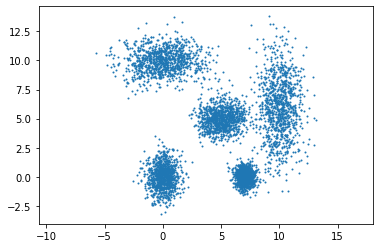

In [34]:
# The data is geneated from 5 gaussians with different means, differnet covariance matrices
k = 5
X = np.loadtxt('synthetic.csv', delimiter=',')
plt.scatter(X[:, 0], X[:, 1], s=1)
plt.axis('equal')
plt.show()

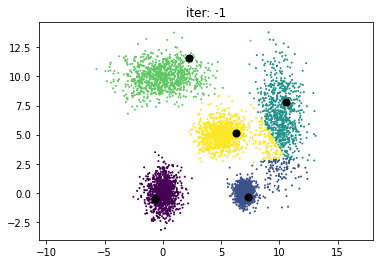

Iteration: 0, log-likelihood: -22493.831314398343


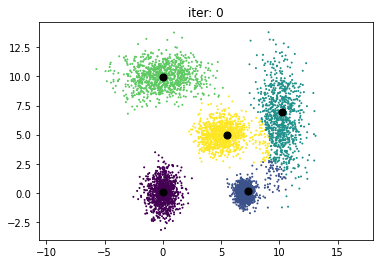

Iteration: 1, log-likelihood: -22120.12339057186


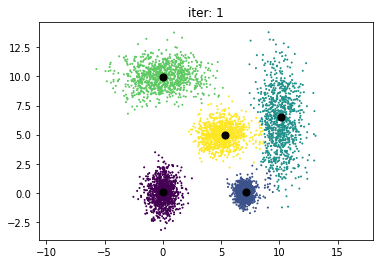

Iteration: 2, log-likelihood: -21804.489160815046


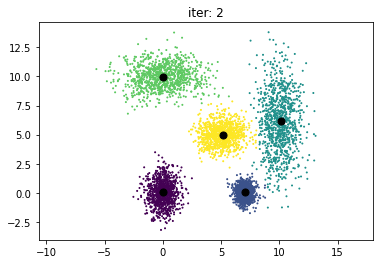

Iteration: 3, log-likelihood: -21731.056290825083


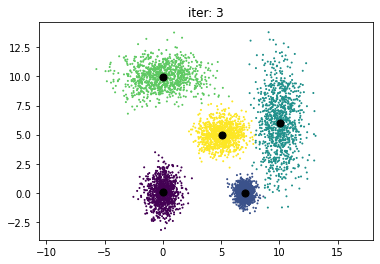

Iteration: 4, log-likelihood: -21725.659453822376


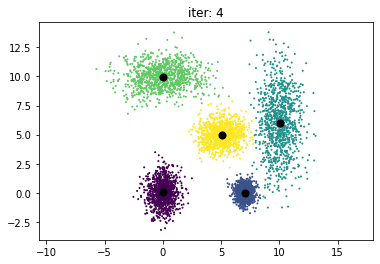

Iteration: 5, log-likelihood: -21725.289318803807


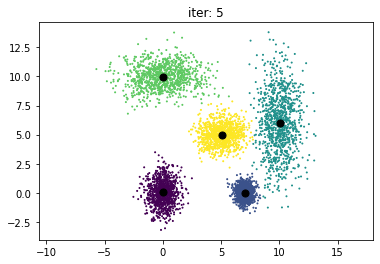

Iteration: 6, log-likelihood: -21725.261080716977


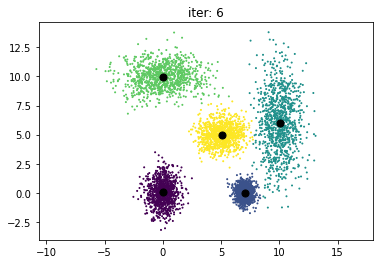

Iteration: 7, log-likelihood: -21725.258874749987


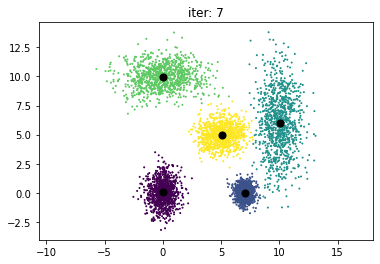

Iteration: 8, log-likelihood: -21725.25870154753


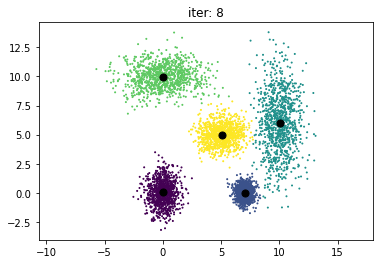

Iteration: 9, log-likelihood: -21725.25868793298


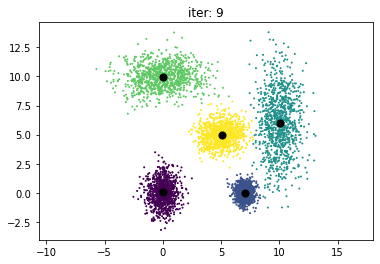

In [35]:
# run EM algorithm
pi, mu, sigma = EM(X, k)

## A quick validation of your implementation:
## log-likelihood should increase after each iteration, and is around ~-20000.

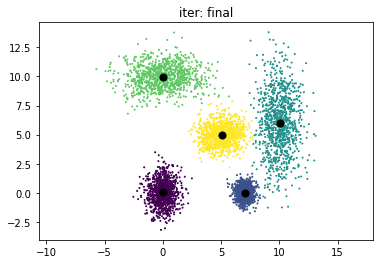

In [36]:
# The following draws the means and clusters of the final result.
draw(X, pi, mu, sigma, 'final')

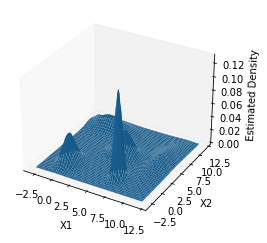

In [37]:
# The following plots the estimated density on a 3D grid.
x1 = np.linspace(-3, 12, 100)
x2 = np.linspace(-3, 12, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros(X1.shape)
for j in range(k):
    Z += pi[j] * multivariate_normal(mean=mu[j], cov=sigma[j]).pdf(np.dstack((X1, X2)))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.grid(False)
ax.plot_surface(X1, X2, Z)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Estimated Density')
plt.show()

### 2. Image Compression [20 points]

Now let's explore the application of Gaussian mixture model to image compression. We will use the GMM from sklearn package to compress the image as it provides much more stable and faster implementation! The GMM will be trained on the pixels of the image and the cluster assignment for each pixel will be used to replace the original pixel value. The number of clusters is a hyperparameter that can be tuned to control the compression rate. The higher the number of clusters, the higher the compression rate.

In [38]:
!pip install scikit-learn
from sklearn.mixture import GaussianMixture

Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple


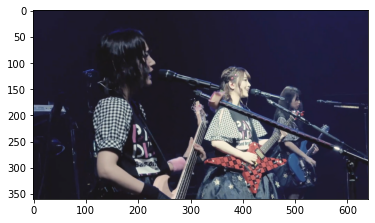

In [39]:
image = plt.imread('compression.png')
plt.imshow(image)
plt.show()

In [40]:
# image compression using EM in sklearn
def GMM_compression(image, k):
    X = image.reshape(-1, image.shape[2])
    image_compressed = np.zeros(X.shape)
    ##################################################################################################################
    # TODO:                                                                                                          #
    # Refer to https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html                #
    # Create a GaussianMixture object with k components and fit the image data (X).                                  #
    # Then, predict the cluster label of each pixel and replace each pixel by its corresponding cluster mean.        #
    # Finally, reshape the compressed image to the original image shape.                                             #
    ##################################################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    gmm_object = GaussianMixture(n_components = k, max_iter =10000, random_state = 10)
    gmm_object.fit(X)
    predict_image_label = gmm_object.predict(X)
    ##print(predict_image_label[:])
    for i in range(X.shape[0]):
        image_compressed[i] = gmm_object.means_[predict_image_label[i]]
    image_compressed = image_compressed.reshape(image.shape[0], image.shape[1], image.shape[2])

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


    original_size = image.shape[0] * image.shape[1] * image.shape[2] * 32
    # the compressed image stores the label of each pixel, which can be represented by np.log2(k) bits
    # and the mean of each cluster, which can be represented by 4 * 32 bits
    compressed_size = image_compressed.shape[0] * image_compressed.shape[1] * np.log2(k) + 4 * 32 * k
    compression_rate = original_size / compressed_size
    plt.title(f'Compression rate: {compression_rate:.2f}, k={k}')
    plt.imshow(image_compressed)
    plt.show()

Now let's see how the image looks like after compression under different number of clusters. Here Compression rate is defined as the theoeretical number of bits required to represent the image divided by the number of bits required to represent the compressed image.

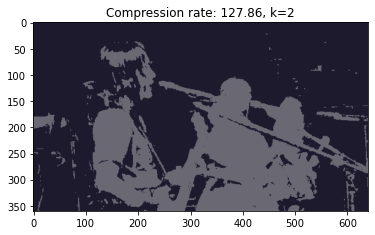

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


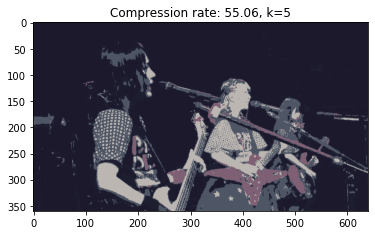

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


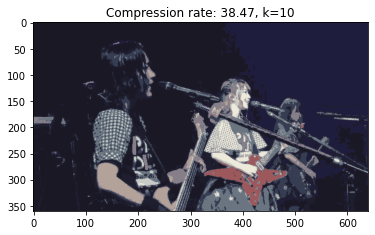

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


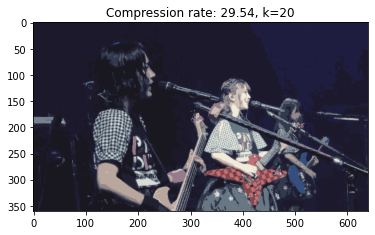

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


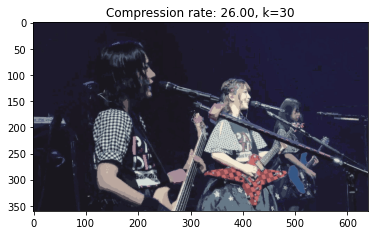

In [41]:
for k in [2, 5, 10, 20, 30]:
    GMM_compression(image, k)